In [212]:
import scipy.io as si
import numpy as np

#load dataset
File = si.loadmat('ex7data2.mat')

# X contain initial training data
X = np.array(File['X'])

#initialize Total Number of clusters and Cluster Centroids
K = 3
init_cluster_centroid = np.array([(3,3),(6,2),(8,5)]).reshape(3,2)

In [214]:
#find closet centroids for each training data (cluster assignment step)
def  findClosestCentroids(X, initial_centroids):
    
    idx = np.zeros((len(X),1))
    temp = np.zeros((len(X),initial_centroids.shape[0]))
    
    for i in range(initial_centroids.shape[0]):
        
        #calculate distance between two points
        temp[:,i] = ((X - initial_centroids[i])**2).sum(axis = 1)
    
    idx = np.argmin(temp,axis = 1) + 1
    return idx

idx = findClosestCentroids(X,init_cluster_centroid)
print(idx[0:3])

[1 3 2]


In [215]:
#Compute means (second step of K-means algorithm)
def computeCentroids(X, idx, K):
    
    centroids = np.zeros((K,X.shape[1]))
    
    for i in range(1,K + 1):
        temp = X[np.where(idx == i)]
        centroids[i-1] = temp.mean(0)
    
    return centroids

centroids = computeCentroids(X, idx, K)
print(centroids)

[[ 2.42830111  3.15792418]
 [ 5.81350331  2.63365645]
 [ 7.11938687  3.6166844 ]]


# K-MEANS CLUSTERING

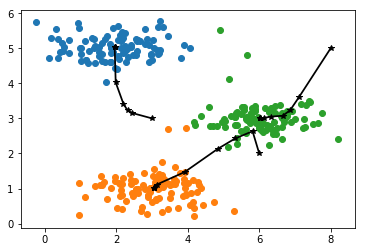

In [218]:
import matplotlib.pyplot as plt

max_iters = 10

#Run K-Means Algorithm plot graph to show how position of centroids change in every iteration
def runkMeans(X, initial_centroids, max_iters , plot_progress,l):
    
    idx = np.zeros((len(X),1))
    K = len(initial_centroids)
    centroids = initial_centroids
    #plt.figure(figsize = (9,7))
    previous_centroids = np.zeros((max_iters +1,initial_centroids.shape[0]*initial_centroids.shape[1]))
    previous_centroids[0] = centroids.ravel()
    
    for i in range(max_iters):
        
        idx = findClosestCentroids(X,centroids)
        centroids = computeCentroids(X, idx, K)
        previous_centroids[i+1] = centroids.ravel()
    
    if plot_progress == True:
        
        j = 0
        for i in range(1,K+1):
            
            #plot-dataset
            temp = X[np.where(idx == i)]
            plt.scatter(temp[:,0],temp[:,1])
        
            #plot history of centroids
            plt.plot(previous_centroids[:,i + j - 1],previous_centroids[:,i + j],'black',linewidth = 1.75,marker = '*')
            j = j + l
    
    return centroids , idx

centroids, idx = runkMeans(X, init_cluster_centroid, max_iters,True,1)

In [188]:
from sklearn.utils import shuffle #to shuffle an array

#initalize centroids randomly
def kMeansInitCentroids(X, K):
    centroids = shuffle(X)
    return centroids[:K,:]
    
    ''''centroids = np.zeros((K,X.shape[1]))
    randidx = np.random.permutation(len(X))
    centroids = X[randidx[0:K],:]'''
    
    return centroids
    
init_cluster_centroid = kMeansInitCentroids(X, K)
print(init_cluster_centroid)

[[ 0.47647355  5.13535977]
 [ 3.02836363  1.35635189]
 [ 4.05386581  0.53291862]]


# Image compression with K-means

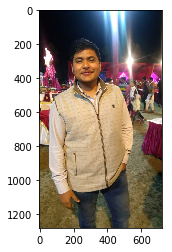

In [244]:
#load image using .png file
import imageio

Image = imageio.imread('test.jpg')

#to get all values in a range 0-1
Image = Image / 255
plt.imshow(Image)

img_size = Image.shape
#load image using .mat file
#File = si.loadmat('bird_small.mat')

In [245]:
#reshape our image into a M*3 matrix where each row gives value of RGB for each pixel
X_new = np.array(Image).reshape(img_size[0]*img_size[1],img_size[2])
print(X_new.shape)

(921600, 3)


[[ 0.41250656  0.11731235  0.18823112]
 [ 0.61263219  0.3030951   0.27568621]
 [ 0.13014139  0.19016158  0.26812967]
 [ 0.06928009  0.07774301  0.1064164 ]
 [ 0.7003637   0.58554989  0.4958417 ]
 [ 0.71375267  0.51854425  0.31645461]
 [ 0.80641848  0.69720767  0.56323881]
 [ 0.94296355  0.96750583  0.96633849]
 [ 0.86903897  0.78936341  0.77986229]
 [ 0.83865475  0.66320328  0.44324152]
 [ 0.50985503  0.4481346   0.33739846]
 [ 0.41915668  0.33922005  0.19132334]
 [ 0.32049833  0.44880094  0.58704018]
 [ 0.25079097  0.21455357  0.16264469]
 [ 0.90008448  0.77990836  0.62173279]
 [ 0.52922504  0.74864961  0.91159511]]


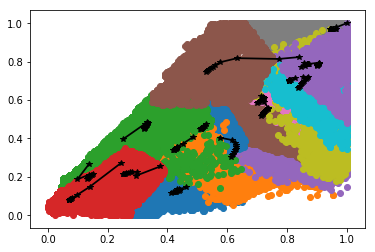

In [246]:
K_n = 16
max_iters = 10
n_init_cluster_centroid = kMeansInitCentroids(X_new, K_n)

centroids, idx = runkMeans(X_new, n_init_cluster_centroid, max_iters,True,2)
print(centroids)

# Image Compression

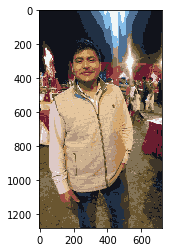

In [247]:
idx_new = findClosestCentroids(X_new,centroids)
X_recovered = centroids[idx_new[:] - 1]
X_recovered = X_recovered.reshape((img_size))
plt.imshow(X_recovered)